<a href="https://colab.research.google.com/github/ShubhamJadhav03/DeepLearning/blob/main/DigitsRecognition_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

mnist consist dataset required for Digit recognition

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


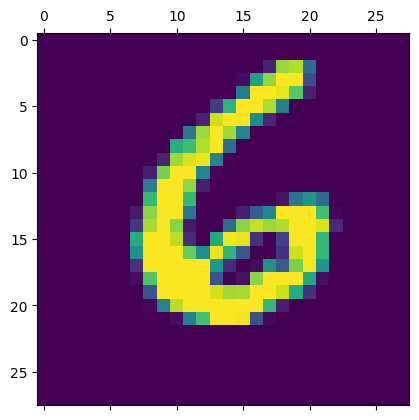

In [6]:
plt.matshow(X_train[90])

Scailing matrix ie X_train and X_test to improve performance

In [7]:
X_train = X_train / 255
X_test = X_test / 255

Trying Neural Network without Hidden Layer

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

Transformed data to 1 Dimensional Arrray

In [11]:
X_train_flattened.shape

(60000, 784)

In [14]:
model =  keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8080 - loss: 0.7392
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9117 - loss: 0.3123
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9183 - loss: 0.2894
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9234 - loss: 0.2770
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9265 - loss: 0.2678
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9307 - loss: 0.2542
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9280 - loss: 0.2570
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9291 - loss: 0.2584
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9295 - loss: 0.2571
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9310 - loss: 0.2516


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9174 - loss: 0.2996


[0.2640959620475769, 0.9282000064849854]

In [16]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [17]:
y_pred_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [20]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

Text(95.72222222222221, 0.5, 'Truth')

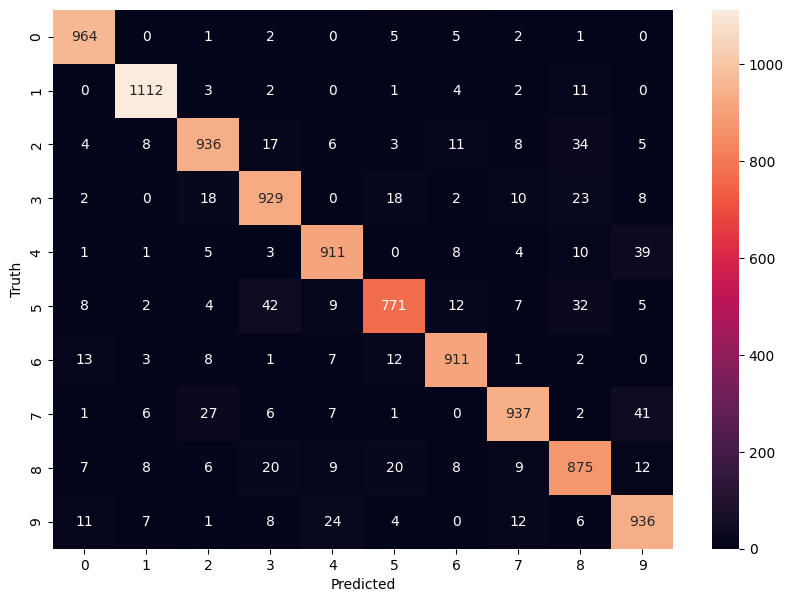

In [22]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Hidden Layer  + Using Flatten Layer

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, activation='relu'),  #how 100? ans no fix just less than init 784
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8719 - loss: 0.4497
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9621 - loss: 0.1306
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9748 - loss: 0.0858
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9805 - loss: 0.0644
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0499
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9885 - loss: 0.0405
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9909 - loss: 0.0306
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9927 - loss: 0.0255
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9937 - loss: 0.0203
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9943 - loss: 0.0181
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9959 - loss: 0.0147
Epoch 12/15
1875/1875 ━━━━━

In [25]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.1120


[0.09392606467008591, 0.9778000116348267]

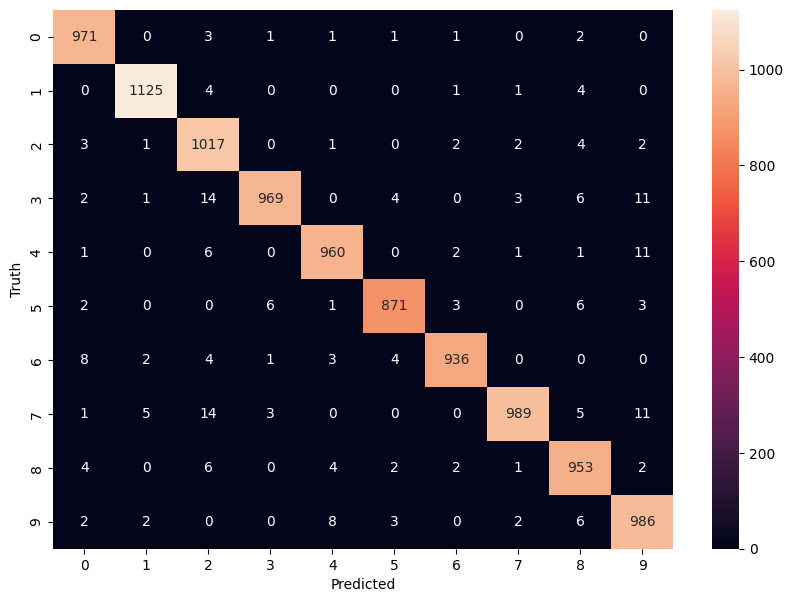

In [29]:
import numpy as np

# Convert predicted probabilities to class labels
y_predicted_labels = np.argmax(y_predicted, axis=1)

# Compute confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
